<div align='center'>
<h1><b>BookGenie</b></h1>
<i><b>Your intelligent reading companion blending crowd wisdom and user similarity to recommend the perfect next read</b></i></div>


## Project Overview

**BookGenie** a book recommendation engine combining popularity-based heuristics and user-item collaborative filtering. BookGenie delivers personalized book suggestions by analyzing global trends and individual reading patterns, improving relevance and scalability across diverse user bases.

# **Essential Imports**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv('../Data/Books.csv')
ratings = pd.read_csv('../Data/Ratings.csv')

In [3]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [4]:
ratings.head()

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

# **Inspect the Data**

In [5]:
# Basic information about our dataset

print("=== BASIC DATASET INFORMATION ===")

print(f"Dataset shape: {books.shape}")

print(f"\n=== Column names ===\n{books.columns.tolist()}")

print(f"\n==== Data types ===\n{books.dtypes} ")

print(f"\n=== Missing values ===\n{books.isnull().sum()}")

print(f"\n=== Missing percentage ===\n{(books.isnull().sum()/len(books))*100}")

print(f"\n=== Duplicate rows ===\n{books.duplicated().sum()}")

=== BASIC DATASET INFORMATION ===
Dataset shape: (271360, 8)

=== Column names ===
['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

==== Data types ===
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object 

=== Missing values ===
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

=== Missing percentage ===
ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000737
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
d

In [6]:
books['Book-Author'] = books['Book-Author'].fillna('Unknown')
books['Publisher'] = books['Publisher'].fillna('Unknown')

In [7]:
# Basic information about our dataset

print("=== BASIC DATASET INFORMATION ===")

print(f"Dataset shape: {ratings.shape}")

print(f"\n=== Column names ===\n{ratings.columns.tolist()}")

print(f"\n==== Data types ===\n{ratings.dtypes} ")

print(f"\n=== Missing values ===\n{ratings.isnull().sum()}")

print(f"\n=== Missing percentage ===\n{(ratings.isnull().sum()/len(ratings))*100}")

print(f"\n=== Duplicate rows ===\n{ratings.duplicated().sum()}")

=== BASIC DATASET INFORMATION ===
Dataset shape: (1149780, 3)

=== Column names ===
['User-ID', 'ISBN', 'Book-Rating']

==== Data types ===
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object 

=== Missing values ===
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

=== Missing percentage ===
User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

=== Duplicate rows ===
0


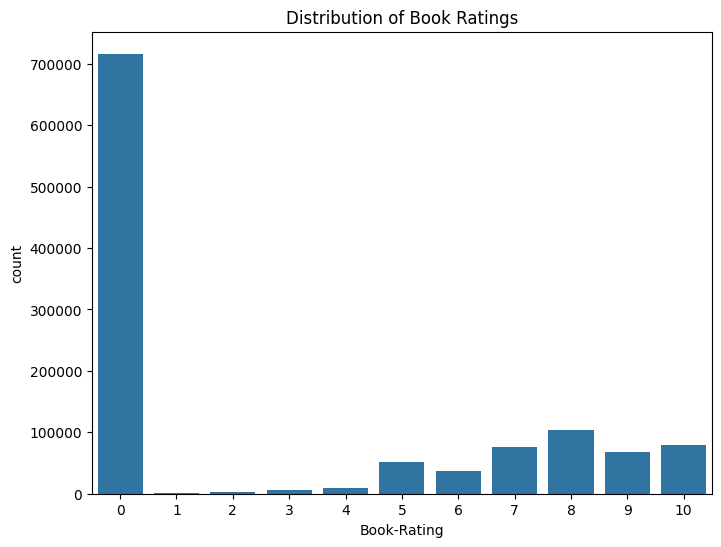

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ratings, x='Book-Rating')
plt.title('Distribution of Book Ratings')
plt.show()

# **Popularity-Based Recommender (Phase-I of BookGenie)**
They are the simplest recommender types, based on aggregate statistics, not personalization.

In [9]:
# Merge both datasets

merged = ratings.merge(books,on='ISBN')

In [10]:
merged.shape

(1031136, 10)

In [11]:
merged.head(3)

User-ID        ISBN  Book-Rating            Book-Title      Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel       M. J. Rose   
1   276726  0155061224            5      Rites of Passage       Judith Rae   
2   276727  0446520802            0          The Notebook  Nicholas Sparks   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2001            Heinle   
2                1996      Warner Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/0155061224.0...  
2  http://images.amazon.com/images/P/0446520802.0...

# **Let's perform some EDA**

In [12]:
 # How many ratings per book?

ratings_per_book = merged.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [13]:
ratings_per_book.columns = ['Book-Title','num_ratings']

In [14]:
ratings_per_book.head()

Book-Title  num_ratings
0   A Light in the Storm: The Civil War Diary of ...            4
1                              Always Have Popsicles            1
2               Apple Magic (The Collector's series)            1
3   Ask Lily (Young Women of Faith: Lily Series, ...            1
4   Beyond IBM: Leadership Marketing and Finance ...            1

In [15]:
# top 10 most rated books

ratings_per_book.sort_values('num_ratings', ascending=False).head(10)

Book-Title  num_ratings
234951                                      Wild Animus         2502
196326                        The Lovely Bones: A Novel         1295
183573                                The Da Vinci Code          898
5303                                    A Painted House          838
199237                       The Nanny Diaries: A Novel          828
27922                             Bridget Jones's Diary          815
206502                          The Secret Life of Bees          774
52983   Divine Secrets of the Ya-Ya Sisterhood: A Novel          740
204387              The Red Tent (Bestselling Backlist)          723
14392                               Angels &amp; Demons          670

In [16]:
# let's see average rating per book

avg_rating_per_book = merged.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_per_book.columns = ['Book-Title','avg_rating']

In [17]:
avg_rating_per_book.head(10)

Book-Title  avg_rating
0   A Light in the Storm: The Civil War Diary of ...        2.25
1                              Always Have Popsicles        0.00
2               Apple Magic (The Collector's series)        0.00
3   Ask Lily (Young Women of Faith: Lily Series, ...        8.00
4   Beyond IBM: Leadership Marketing and Finance ...        0.00
5   Clifford Visita El Hospital (Clifford El Gran...        0.00
6                                       Dark Justice       10.00
7                                           Deceived        0.00
8   Earth Prayers From around the World: 365 Pray...        5.00
9   Final Fantasy Anthology: Official Strategy Gu...        5.00

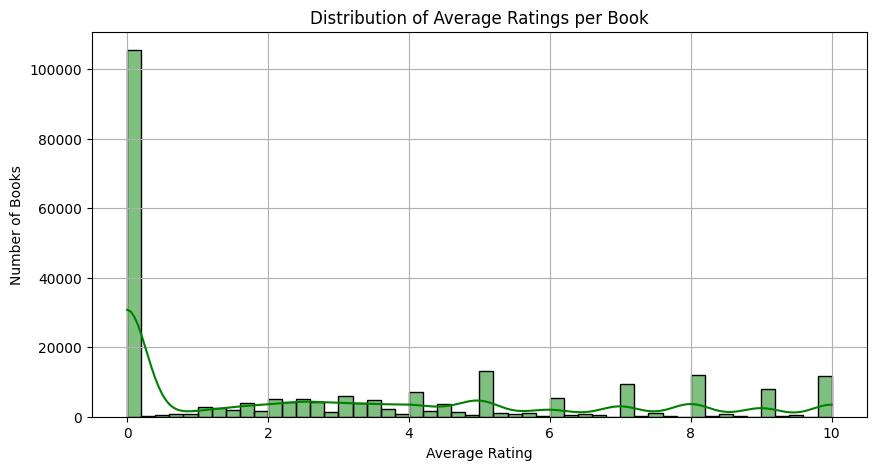

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(avg_rating_per_book['avg_rating'], bins=50, kde=True, color='green')
plt.title('Distribution of Average Ratings per Book')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()

In [19]:
# Ratings Per User

ratings_per_user = merged.groupby('User-ID')['Book-Rating'].count().reset_index()

In [20]:
ratings_per_user.columns = ['User-ID', 'num_ratings']

# the most active users 😎

ratings_per_user = ratings_per_user.sort_values('num_ratings', ascending=False)
ratings_per_user.head(10)

User-ID  num_ratings
3629     11676        11144
65332   198711         6456
50848   153662         5814
32581    98391         5779
11848    35859         5646
70091   212898         4289
91952   278418         3996
25274    76352         3329
36648   110973         2971
77479   235105         2943

# **Merge Rating Count & Average Rating**

In [21]:
# Merge ratings_per_book and avg_rating_per_book dataframes

popularity_df = ratings_per_book.merge(avg_rating_per_book,on='Book-Title')

In [22]:
popularity_df

Book-Title  num_ratings  \
0        A Light in the Storm: The Civil War Diary of ...            4   
1                                   Always Have Popsicles            1   
2                    Apple Magic (The Collector's series)            1   
3        Ask Lily (Young Women of Faith: Lily Series, ...            1   
4        Beyond IBM: Leadership Marketing and Finance ...            1   
...                                                   ...          ...   
241066                                      Ã?Â?lpiraten.            2   
241067                     Ã?Â?rger mit Produkt X. Roman.            4   
241068                                Ã?Â?sterlich leben.            1   
241069                              Ã?Â?stlich der Berge.            3   
241070                                  Ã?Â?thique en toc            2   

        avg_rating  
0         2.250000  
1         0.000000  
2         0.000000  
3         8.000000  
4         0.000000  
...            ...  
241066    0.000000  
241067    5.250000  
241068    7.000000  
241069    2.666667  
241070    4.000000  

[241071 rows x 3 columns]

# **Filter by rating threshold**
I am removing unreliable entries (books with only 1–2 ratings) by applying a threshold.

In [23]:
# ratings_counts = ratings_per_book['num_ratings'].values
# p80 = np.percentile(ratings_counts, 80)
# p90 = np.percentile(ratings_counts, 90)
# p95 = np.percentile(ratings_counts, 95)

# print(f"80th percentile of ratings count: {p80:.2f}")
# print(f"90th percentile of ratings count: {p90:.2f}")
# print(f"95th percentile of ratings count: {p95:.2f}")

In [24]:
# If you want more books in your popularity pool you could try m = 10 or 15. I want top 50 books so, I am using m >= 250

popularity_df = popularity_df[popularity_df['num_ratings'] >= 250] 

In [25]:
popularity_df

Book-Title  num_ratings  \
764                                                  1984          284   
818                                   1st to Die: A Novel          509   
1048                                           2nd Chance          356   
1760                                   A Bend in the Road          346   
2281    A Child Called \It\": One Child's Courage to S...          265   
...                                                   ...          ...   
233850                           White Oleander : A Novel          387   
233851       White Oleander : A Novel (Oprah's Book Club)          356   
234740  Wicked: The Life and Times of the Wicked Witch...          326   
234951                                        Wild Animus         2502   
240860                                \O\" Is for Outlaw"          269   

        avg_rating  
764       4.454225  
818       3.575639  
1048      3.269663  
1760      3.364162  
2281      4.086792  
...            ...  
233850    3.506460  
233851    3.772472  
234740    3.766871  
234951    1.019584  
240860    2.988848  

[186 rows x 3 columns]

# **Compute Weighted Score**

**Formula:**

Score = (v / (v + m)) * R + (m / (v + m)) * C

Where:

- **R** = average rating of the book  
- **v** = number of ratings for the book  
- **m** = minimum ratings threshold
- **C** = mean of all average ratings

In [26]:
C = popularity_df['avg_rating'].mean()
m = 250

In [27]:
popularity_df['popularity_score'] = (
    (popularity_df['num_ratings'] / (popularity_df['num_ratings'] + m)) * popularity_df['avg_rating'] +
    (m / (popularity_df['num_ratings'] + m)) * C
)

In [28]:
popularity_df.head()

Book-Title  num_ratings  \
764                                                1984          284   
818                                 1st to Die: A Novel          509   
1048                                         2nd Chance          356   
1760                                 A Bend in the Road          346   
2281  A Child Called \It\": One Child's Courage to S...          265   

      avg_rating  popularity_score  
764     4.454225          3.984132  
818     3.575639          3.534291  
1048    3.269663          3.344103  
1760    3.364162          3.400213  
2281    4.086792          3.777722

# **Here are the Top 50 Books**

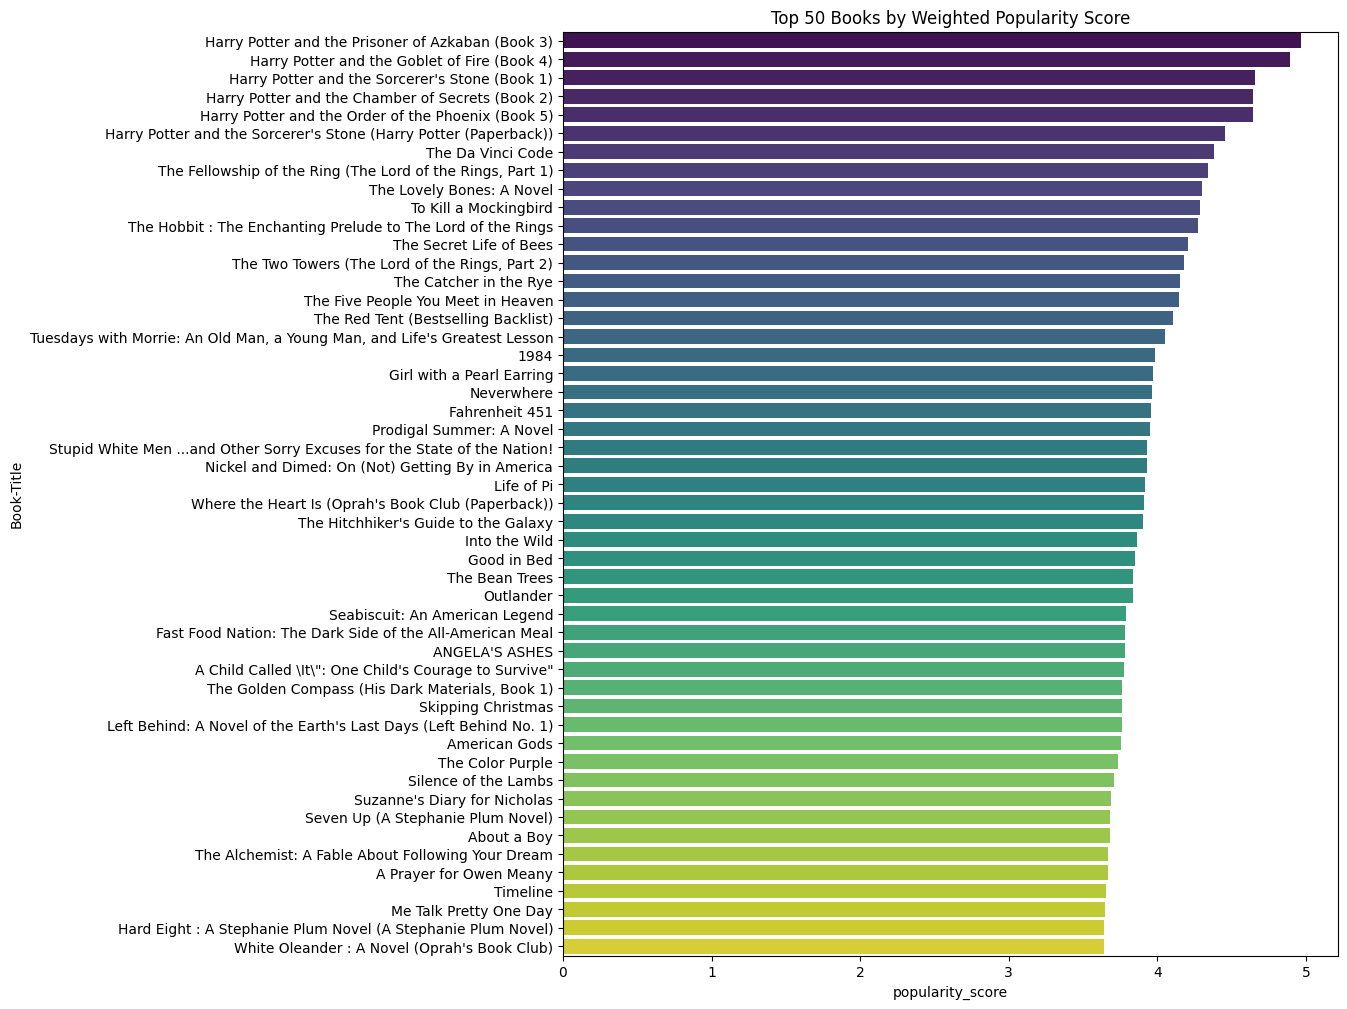

In [29]:
# --- Visualizing the top 50 results ---
top_50 = popularity_df.sort_values(by='popularity_score', ascending=False).head(50)

plt.figure(figsize=(10, 12))
sns.barplot(data=top_50, x='popularity_score', y='Book-Title',palette='viridis')
plt.title('Top 50 Books by Weighted Popularity Score')
plt.show()

In [30]:
top_50.shape

(50, 4)

In [31]:
top_50.duplicated().sum()

np.int64(0)

In [32]:
# let's merge these top books with books dataset

top_50 = top_50.merge(books, on='Book-Title', how='left') \
                     .drop_duplicates('Book-Title') \
                     [['Book-Title','Book-Author','Publisher', 'Year-Of-Publication','Image-URL-L','num_ratings','avg_rating','popularity_score']]

In [33]:
top_50.head(10)

Book-Title     Book-Author  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)   J. K. Rowling   
3        Harry Potter and the Goblet of Fire (Book 4)   J. K. Rowling   
5      Harry Potter and the Sorcerer's Stone (Book 1)   J. K. Rowling   
9    Harry Potter and the Chamber of Secrets (Book 2)   J. K. Rowling   
12  Harry Potter and the Order of the Phoenix (Boo...   J. K. Rowling   
16  Harry Potter and the Sorcerer's Stone (Harry P...   J. K. Rowling   
18                                  The Da Vinci Code       Dan Brown   
24  The Fellowship of the Ring (The Lord of the Ri...  J.R.R. TOLKIEN   
33                          The Lovely Bones: A Novel    Alice Sebold   
34                              To Kill a Mockingbird      Harper Lee   

                     Publisher Year-Of-Publication  \
0                   Scholastic                1999   
3                   Scholastic                2000   
5                   Scholastic                1998   
9                   Scholastic                2000   
12                  Scholastic                2003   
16      Arthur A. Levine Books                1999   
18                   Doubleday                2003   
24                     Del Rey                1986   
33               Little, Brown                2002   
34  Little Brown &amp; Company                1988   

                                          Image-URL-L  num_ratings  \
0   http://images.amazon.com/images/P/0439136350.0...          428   
3   http://images.amazon.com/images/P/0439139597.0...          387   
5   http://images.amazon.com/images/P/0590353403.0...          278   
9   http://images.amazon.com/images/P/0439064872.0...          556   
12  http://images.amazon.com/images/P/043935806X.0...          347   
16  http://images.amazon.com/images/P/059035342X.0...          575   
18  http://images.amazon.com/images/P/0385504209.0...          898   
24  http://images.amazon.com/images/P/0345339703.0...          368   
33  http://images.amazon.com/images/P/0316666343.0...         1295   
34  http://images.amazon.com/images/P/0446310786.0...          510   

    avg_rating  popularity_score  
0     5.852804          4.966853  
3     5.824289          4.892507  
5     5.737410          4.654407  
9     5.183453          4.645815  
12    5.501441          4.642423  
16    4.895652          4.457608  
18    4.642539          4.382863  
24    4.948370          4.342276  
33    4.468726          4.303901  
34    4.700000          4.288851

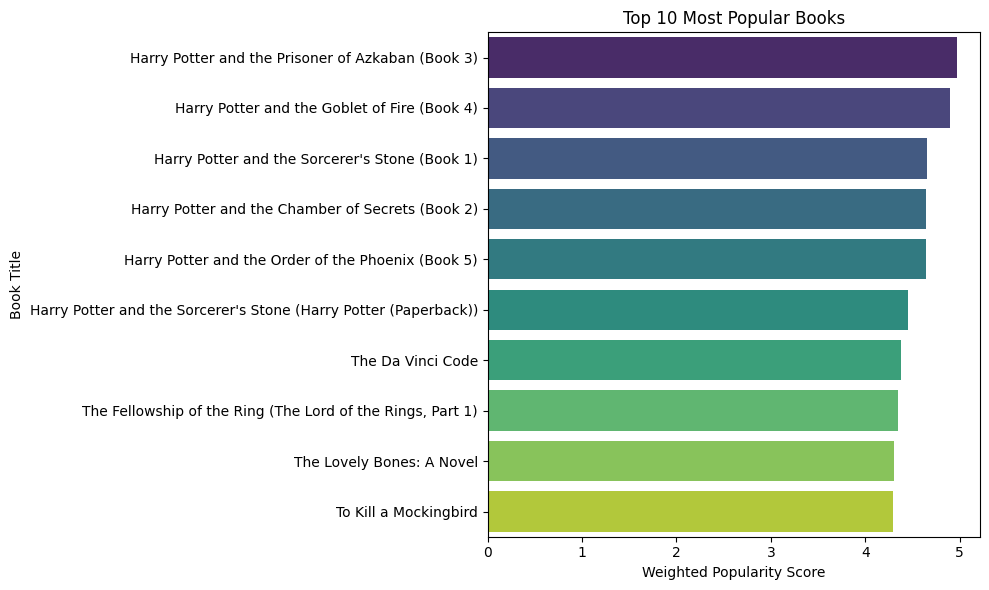

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_50.head(10),
    x='popularity_score',
    y='Book-Title',
    palette='viridis'
)
plt.xlabel('Weighted Popularity Score')
plt.ylabel('Book Title')
plt.title('Top 10 Most Popular Books')
plt.tight_layout()
plt.show()

# **Conclusion**
In this notebook, we built BookGenie, a popularity-based book recommender that leverages user rating data to identify high-quality, widely appreciated books.

# Phase II: Collaborative Filtering-Based Recommender (BookGenie)

BookGenie enters Phase II with a Collaborative Filtering approach to personalize book recommendations by learning from user-item interactions (such as ratings).

The core assumption behind collaborative filtering is:

> **"Users who agreed in the past tend to agree again in the future."**  
> _If User A liked books X and Y, and User B liked book X, then User B might also like book Y._


## Types of Collaborative Filtering

**1. User-Based Collaborative Filtering (UBCF)**  
Recommends books by identifying users with similar preferences.  
- Compares users based on common rating patterns  
- Predicts books a user might like based on ratings from top-N similar users  
- Struggles with sparse data and scalability


**2. Item-Based Collaborative Filtering (IBCF)**   
Recommends books that are similar to those the user has already rated highly.  
- Computes similarity between books based on user ratings  
- More stable and interpretable  
- Works well when users rate only a few books(sparse data)


**3. Model-Based Collaborative Filtering**  
Uses matrix factorization (e.g. SVD) to learn hidden patterns in user-book interactions.  
- Learns latent features for users and books  
- Generalizes well and handles sparse matrices  


*BookGenie Uses Item-Based CF in Phase II* 

In [35]:
merged.head()

User-ID        ISBN  Book-Rating  \
0   276725  034545104X            0   
1   276726  0155061224            5   
2   276727  0446520802            0   
3   276729  052165615X            3   
4   276729  0521795028            6   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

  Year-Of-Publication                   Publisher  \
0                2002            Ballantine Books   
1                2001                      Heinle   
2                1996                Warner Books   
3                1999  Cambridge University Press   
4                2001  Cambridge University Press   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   
3  http://images.amazon.com/images/P/052165615X.0...   
4  http://images.amazon.com/images/P/0521795028.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/0155061224.0...   
2  http://images.amazon.com/images/P/0446520802.0...   
3  http://images.amazon.com/images/P/052165615X.0...   
4  http://images.amazon.com/images/P/0521795028.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/0155061224.0...  
2  http://images.amazon.com/images/P/0446520802.0...  
3  http://images.amazon.com/images/P/052165615X.0...  
4  http://images.amazon.com/images/P/0521795028.0...

 # **Item-Based Collaborative Filtering (IBCF)**
Item-Based Collaborative Filtering recommends books to a user by identifying books that are similar to the ones they have already rated highly, based on how other users have rated both items.

Example:
- User A liked "The Hobbit"
- Other users who liked "The Hobbit" also liked "The Lord of the Rings" and "Harry Potter"
- Recommend those to User A

In [36]:
# filter users with < 200 ratings

x = merged.groupby('User-ID')['Book-Rating'].count() > 200
most_active_users = x[x].index

In [37]:
most_active_users.shape

(811,)

In [38]:
filtered_users = merged[merged['User-ID'].isin(most_active_users)]

In [39]:
filtered_users.head(3)

User-ID        ISBN  Book-Rating  \
1150   277427  002542730X           10   
1151   277427  0026217457            0   
1152   277427  003008685X            8   

                                             Book-Title  \
1150  Politically Correct Bedtime Stories: Modern Ta...   
1151                 Vegetarian Times Complete Cookbook   
1152                                           Pioneers   

                Book-Author Year-Of-Publication                  Publisher  \
1150      James Finn Garner                1994  John Wiley &amp; Sons Inc   
1151             Lucy  Moll                1995      John Wiley &amp; Sons   
1152  James Fenimore Cooper                1974           Thomson Learning   

                                            Image-URL-S  \
1150  http://images.amazon.com/images/P/002542730X.0...   
1151  http://images.amazon.com/images/P/0026217457.0...   
1152  http://images.amazon.com/images/P/003008685X.0...   

                                            Image-URL-M  \
1150  http://images.amazon.com/images/P/002542730X.0...   
1151  http://images.amazon.com/images/P/0026217457.0...   
1152  http://images.amazon.com/images/P/003008685X.0...   

                                            Image-URL-L  
1150  http://images.amazon.com/images/P/002542730X.0...  
1151  http://images.amazon.com/images/P/0026217457.0...  
1152  http://images.amazon.com/images/P/003008685X.0...

In [40]:
filtered_users.shape

(474007, 10)

In [41]:
# filter books with < 50 ratings

y = filtered_users.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [42]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [43]:
filtered_books = filtered_users[filtered_users['Book-Title'].isin(famous_books)]

In [44]:
filtered_books.shape

(58586, 10)

In [45]:
filtered_books.duplicated().sum()

np.int64(0)

# **Create the Item-User Matrix**
This matrix is used to:
- Compute similarity between books (based on user behavior)
- Recommend books that are similar to a given book which is useful when a user has rated/liked at least one book.

In [46]:
# Item-User Matrix (for Item-Based CF)
item_user_matrix = filtered_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [47]:
# This includes users who have rated > 200 books, and includes books that have received ≥ 50 ratings

item_user_matrix

User-ID                                             254     2276    2766    \
Book-Title                                                                   
1984                                                   9.0     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN    10.0     NaN   
4 Blondes                                              NaN     NaN     NaN   
A Bend in the Road                                     0.0     NaN     7.0   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     NaN     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             2977    3363    4017    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     NaN     NaN   
A Bend in the Road                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        7.0     NaN     NaN   
You Belong To Me                                       NaN     NaN     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             4385    6251    6323    \
Book-Title                                                                   
1984                                                   NaN     NaN     NaN   
1st to Die: A Novel                                    NaN     NaN     NaN   
2nd Chance                                             NaN     NaN     NaN   
4 Blondes                                              NaN     0.0     NaN   
A Bend in the Road                                     NaN     NaN     NaN   
...                                                    ...     ...     ...   
Year of Wonders                                        NaN     NaN     NaN   
You Belong To Me                                       NaN     NaN     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     NaN     0.0     NaN   
Zoya                                                   NaN     NaN     NaN   
\O\" Is for Outlaw"                                    NaN     NaN     NaN   

User-ID                                             6543    ...  271705  \
Book-Title                                                  ...           
1984                                                   NaN  ...    10.0   
1st to Die: A Novel                                    9.0  ...     NaN   
2nd Chance                                             0.0  ...     NaN   
4 Blondes                                              NaN  ...     NaN   
A Bend in the Road                                     NaN  ...     NaN   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     NaN   
You Belong To Me                                       NaN  ...     NaN   
Zen and the Art of Motorcycle Maintenance: An I...     NaN  ...     NaN   
Zoya                                                   NaN  ...     NaN   
\O\" Is for Outlaw"                                    

In [48]:
final_df = item_user_matrix.fillna(0) 

# **Similarity Computation**

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(final_df)

In [50]:
similarity.shape

(706, 706)

In [51]:
similarity[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

# **Predictive System**

In [52]:
def recommend(book_name):
    index = int(np.where(final_df.index == book_name)[0][0])
    sorted_similarity_scores = sorted(
        list(enumerate(similarity[index])),
        key=lambda x: x[1],
        reverse=True
    )[1:5]

    recommendations = []

    for i in sorted_similarity_scores:
        temp_df = filtered_books[filtered_books['Book-Title'] == final_df.index[i[0]]]
        temp_df = temp_df.drop_duplicates('Book-Title')

        if not temp_df.empty:
            recommendations.append({
                'title': temp_df['Book-Title'].values[0],
                'author': temp_df['Book-Author'].values[0],
                'image': temp_df['Image-URL-L'].values[0]
            })

    return recommendations

In [53]:
recommend('The Da Vinci Code')

[{'title': 'Angels &amp; Demons',
  'author': 'Dan Brown',
  'image': 'http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg'},
 {'title': 'Touching Evil',
  'author': 'Kay Hooper',
  'image': 'http://images.amazon.com/images/P/0553583441.01.LZZZZZZZ.jpg'},
 {'title': 'Saving Faith',
  'author': 'David Baldacci',
  'image': 'http://images.amazon.com/images/P/0446608890.01.LZZZZZZZ.jpg'},
 {'title': "The Sweet Potato Queens' Book of Love",
  'author': 'JILL CONNER BROWNE',
  'image': 'http://images.amazon.com/images/P/0609804138.01.LZZZZZZZ.jpg'}]

In [54]:
def recommend_books(book_name):
    # fetch the index
    index = int(np.where(final_df.index == book_name)[0][0])
    sorted_similarity_scores = sorted(list(enumerate(similarity[index])), key = lambda x:x[1], reverse = True)[1:6]
    for i in sorted_similarity_scores:
        print(final_df.index[i[0]])
        
recommend_books('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [55]:
# sorted(
#     list(enumerate(similarity[int(np.where(final_df.index == 'Zoya')[0][0])])), 
#     key=lambda x: x[1], 
#     reverse=True
# )[1:6]

In [56]:
import pickle
# pickle.dump(top_50,open('../Models/top_50.pkl','wb'))
# pickle.dump(final_df,open('../Models/final_df.pkl','wb'))
# pickle.dump(similarity,open('../Models/similarity.pkl','wb'))
# pickle.dump(filtered_books,open('../Models/filtered_books.pkl','wb'))